In [9]:
import scipy.io as sio
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
import seaborn as sn
import mne
import matplotlib.pyplot as plt
%matplotlib qt
%gui qt

import matplotlib.pyplot as plt

str_DataPath = ''  # path file where the data is stored
str_FileName = 'Sujeto6_R_processed.fif'  # Name of the File

file=(mne.read_epochs(str_FileName))

Dropped 0 epochs: 
Channels marked as bad: none
Reading Sujeto6_R_processed.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-9-c8a62b7c2bec>:16: RuntimeWarning: This filename (Sujeto6_R_processed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  file=(mne.read_epochs(str_FileName))


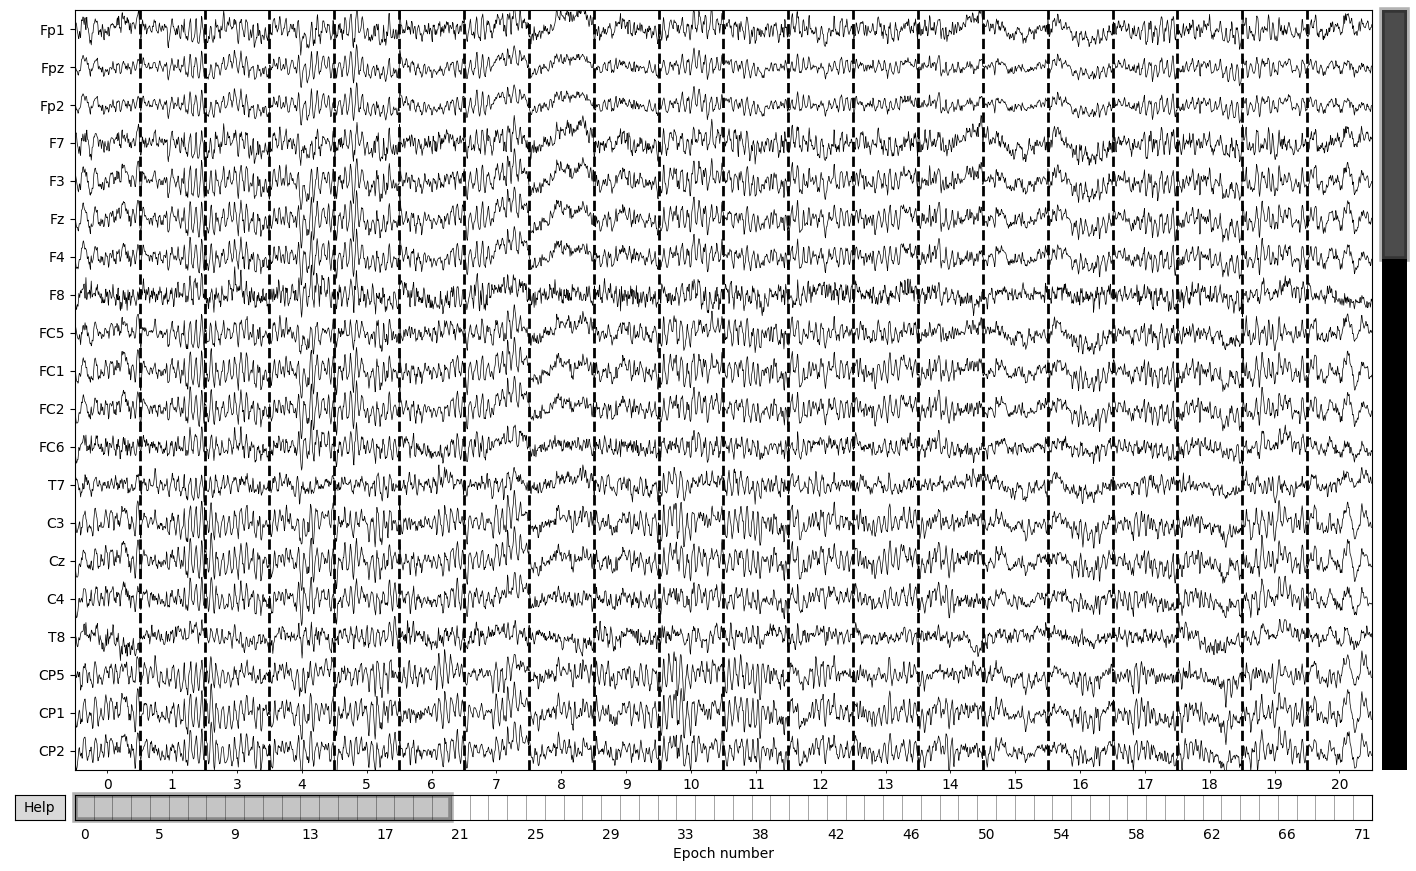

In [10]:
data = file.get_data()  
np.shape(data) #(n_epochs, n_channels, n_times)
first_epoch_first_channel = data[0, 0, :]  
file.plot()  # This will plot all channels for all epochs.

In [5]:
from mne.connectivity import spectral_connectivity

# Compute coherence
fmin, fmax = 8., 12.  # For alpha band
con, freqs, times, n_epochs, n_tapers = spectral_connectivity(
    file, method='coh', mode='multitaper', sfreq=file.info['sfreq'],
    fmin=fmin, fmax=fmax, faverage=True, tmin=0.0, tmax=None, mt_adaptive=True,
    n_jobs=1)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1830 connections
    using t=0.000s..0.500s for estimation (513 points)
    frequencies: 10.0Hz..12.0Hz (2 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7


<ipython-input-5-14333526c107>:8: RuntimeWarning: fmin=8.000 Hz corresponds to 4.008 < 5 cycles based on the epoch length 0.501 sec, need at least 0.625 sec epochs or fmin=9.981. Spectrum estimate will be unreliable.
  n_jobs=1)


    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    computing connectivity for epoch 27
    computing connectivity for epoch 28
    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
  

In [6]:
import matplotlib.pyplot as plt
mne.viz.plot_connectivity_circle(con[:, :, 0], file.ch_names, title='Alpha-band Coherence')
plt.show()

In [7]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import mne
from scipy.stats import pearsonr
import pandas as pd

# Load the epochs file
str_FileName = 'Sujeto6_R_processed.fif'  # Name of the File
epochs = mne.read_epochs(str_FileName)


# Extract the data: shape (n_epochs, n_channels, n_times)
m_Data = epochs.get_data()  # Get the data in (n_epochs, n_channels, n_times)
n_epochs, n_channels, n_times=np.shape(m_Data)

# Initialize adjacency matrices for each epoch
adjacency_matrices = np.zeros((n_epochs, n_channels, n_channels))

# Loop through epochs to calculate adjacency matrix for each epoch
for i_epoch in range(n_epochs):
    print(f'Processing epoch {i_epoch + 1} of {n_epochs}')
    
    # Initialize correlation matrix for this epoch
    correlation_matrix = np.zeros((n_channels, n_channels))
    
    # Loop through each pair of channels to calculate Pearson correlation
    for i_chan1 in range(n_channels):
        for i_chan2 in range(i_chan1, n_channels):
            # Get time series data for the two channels in this epoch
            time_series_1 = m_Data[i_epoch, i_chan1, :]
            time_series_2 = m_Data[i_epoch, i_chan2, :]
            
            # Calculate Pearson correlation
            correlation_value = pearsonr(time_series_1, time_series_2)[0]
            
            # Update correlation matrix (symmetric matrix)
            correlation_matrix[i_chan1, i_chan2] = correlation_value
            correlation_matrix[i_chan2, i_chan1] = correlation_value
    
    # Store the correlation matrix as adjacency matrix for this epoch
    adjacency_matrices[i_epoch] = correlation_matrix

# Example: Plotting the adjacency matrix for the first epoch
tick_labels =  file.ch_names

# Create a DataFrame from the adjacency matrix (correlation matrix) of the first epoch
df = pd.DataFrame(adjacency_matrices[0], columns=tick_labels, index=tick_labels)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(df, xticklabels=tick_labels, yticklabels=tick_labels, cmap='RdYlBu')

# Set the title
title_props = {'family': 'serif', 'size': 20, 'weight': 'bold', 'color': 'black'}
plt.title("Adjacency Matrix (Pearson Correlation)", fontdict=title_props)
plt.show()


Reading Sujeto6_R_processed.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-7-f553218561ef>:10: RuntimeWarning: This filename (Sujeto6_R_processed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(str_FileName)


Processing epoch 1 of 69
Processing epoch 2 of 69
Processing epoch 3 of 69
Processing epoch 4 of 69
Processing epoch 5 of 69
Processing epoch 6 of 69
Processing epoch 7 of 69
Processing epoch 8 of 69
Processing epoch 9 of 69
Processing epoch 10 of 69
Processing epoch 11 of 69
Processing epoch 12 of 69
Processing epoch 13 of 69
Processing epoch 14 of 69
Processing epoch 15 of 69
Processing epoch 16 of 69
Processing epoch 17 of 69
Processing epoch 18 of 69
Processing epoch 19 of 69
Processing epoch 20 of 69
Processing epoch 21 of 69
Processing epoch 22 of 69
Processing epoch 23 of 69
Processing epoch 24 of 69
Processing epoch 25 of 69
Processing epoch 26 of 69
Processing epoch 27 of 69
Processing epoch 28 of 69
Processing epoch 29 of 69
Processing epoch 30 of 69
Processing epoch 31 of 69
Processing epoch 32 of 69
Processing epoch 33 of 69
Processing epoch 34 of 69
Processing epoch 35 of 69
Processing epoch 36 of 69
Processing epoch 37 of 69
Processing epoch 38 of 69
Processing epoch 39 o

Reading Sujeto6_R_processed.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated
Reading Sujeto6_MF_processed.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


<ipython-input-24-a31945e07a07>:9: RuntimeWarning: This filename (Sujeto6_R_processed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  fileR = mne.read_epochs(str_FileName_R)  # No need for extra parentheses
<ipython-input-24-a31945e07a07>:10: RuntimeWarning: This filename (Sujeto6_MF_processed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  fileMF = mne.read_epochs(str_FileName_MF)


Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


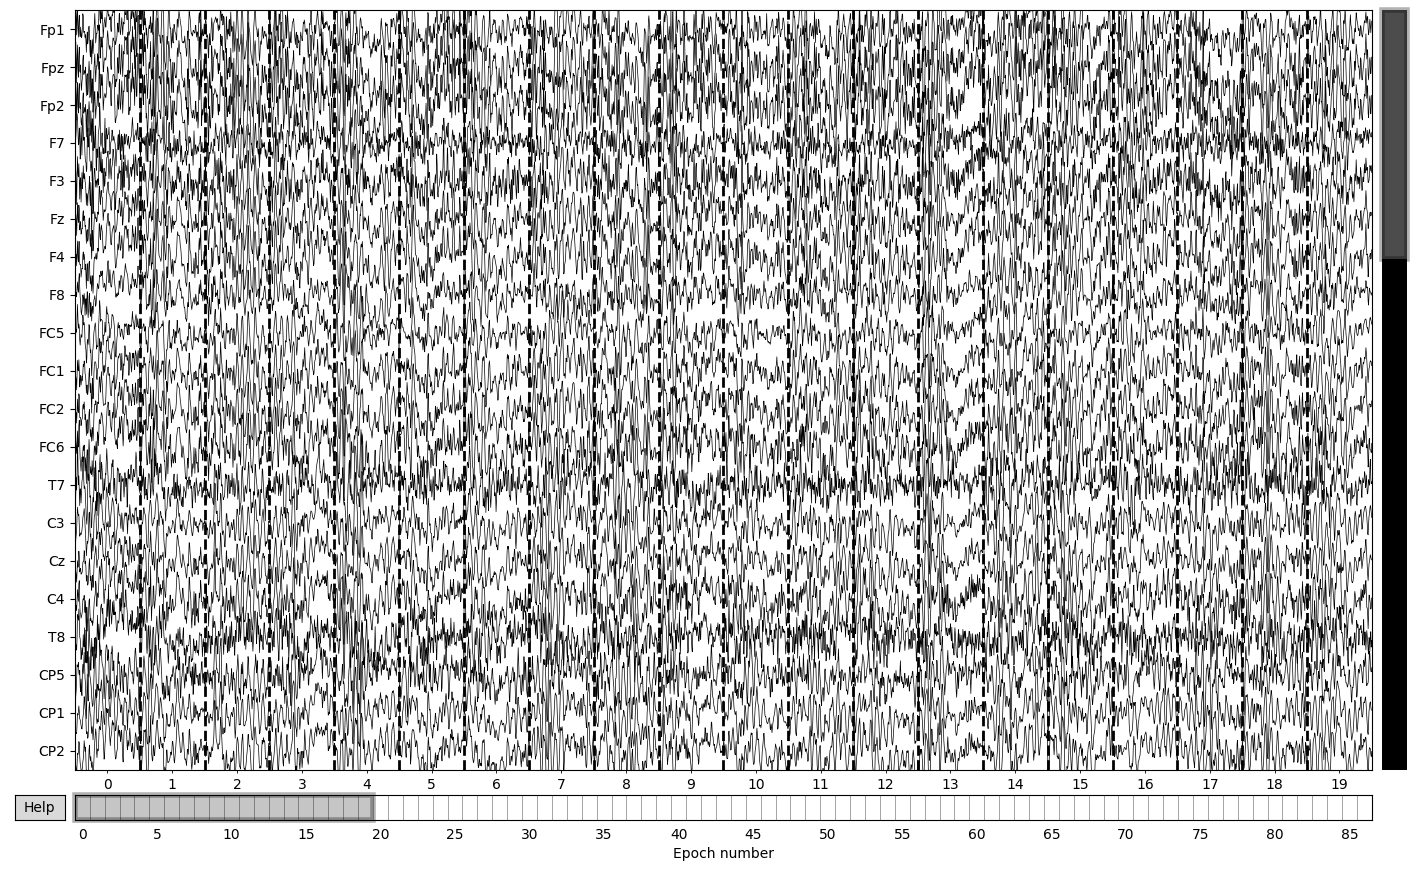

Dropped 0 epochs: 
Channels marked as bad: none


In [24]:
import mne
import numpy as np

# File names for the baseline and signal files
str_FileName_R = 'Sujeto6_R_processed.fif'  # Name of the baseline file
str_FileName_MF = 'Sujeto6_MF_processed.fif'  # Name of the signal file
fileR = mne.read_epochs(str_FileName_R)  
fileMF = mne.read_epochs(str_FileName_MF)

# Get the data 
data_R = fileR.get_data()  # Shape: (n_epochs, n_channels, n_times)
data_MF = fileMF.get_data()
normalized_data = np.zeros_like(data_MF)

for i in range(data_MF.shape[1]):  
    baseline_mean = np.mean(data_R[:, i, :], axis=0)  # Mean 
    baseline_std = np.std(data_R[:, i, :], axis=0)  # Std 
    normalized_data[:, i, :] = (data_MF[:, i, :] - baseline_mean) / baseline_std

# Create a new Epochs object and plot it
normalized_epochs = mne.EpochsArray(normalized_data, fileMF.info)
normalized_epochs.plot(scalings='auto')
